10:50:54 - cmdstanpy - INFO - Chain [1] start processing
10:51:02 - cmdstanpy - INFO - Chain [1] done processing


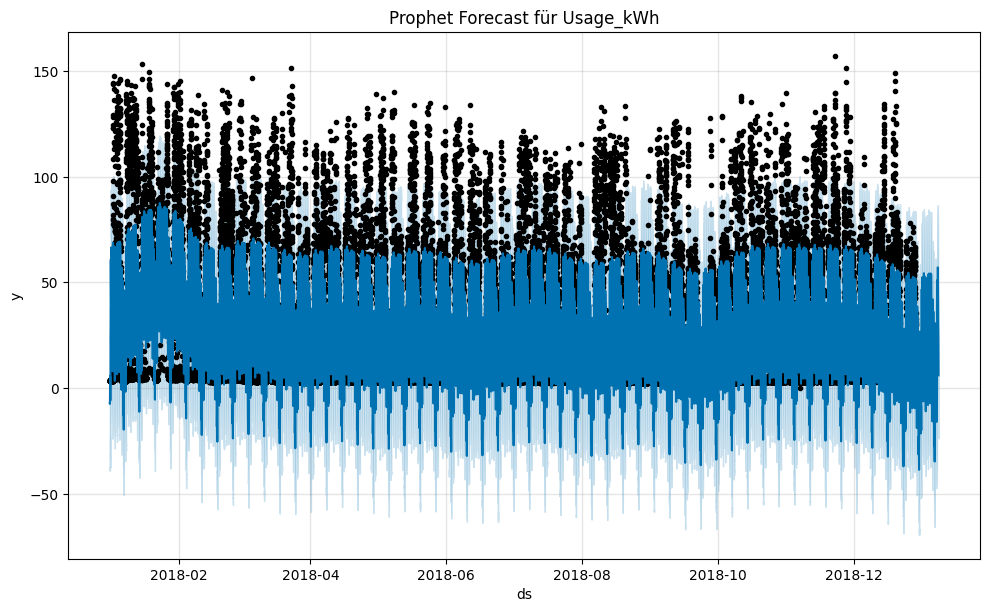

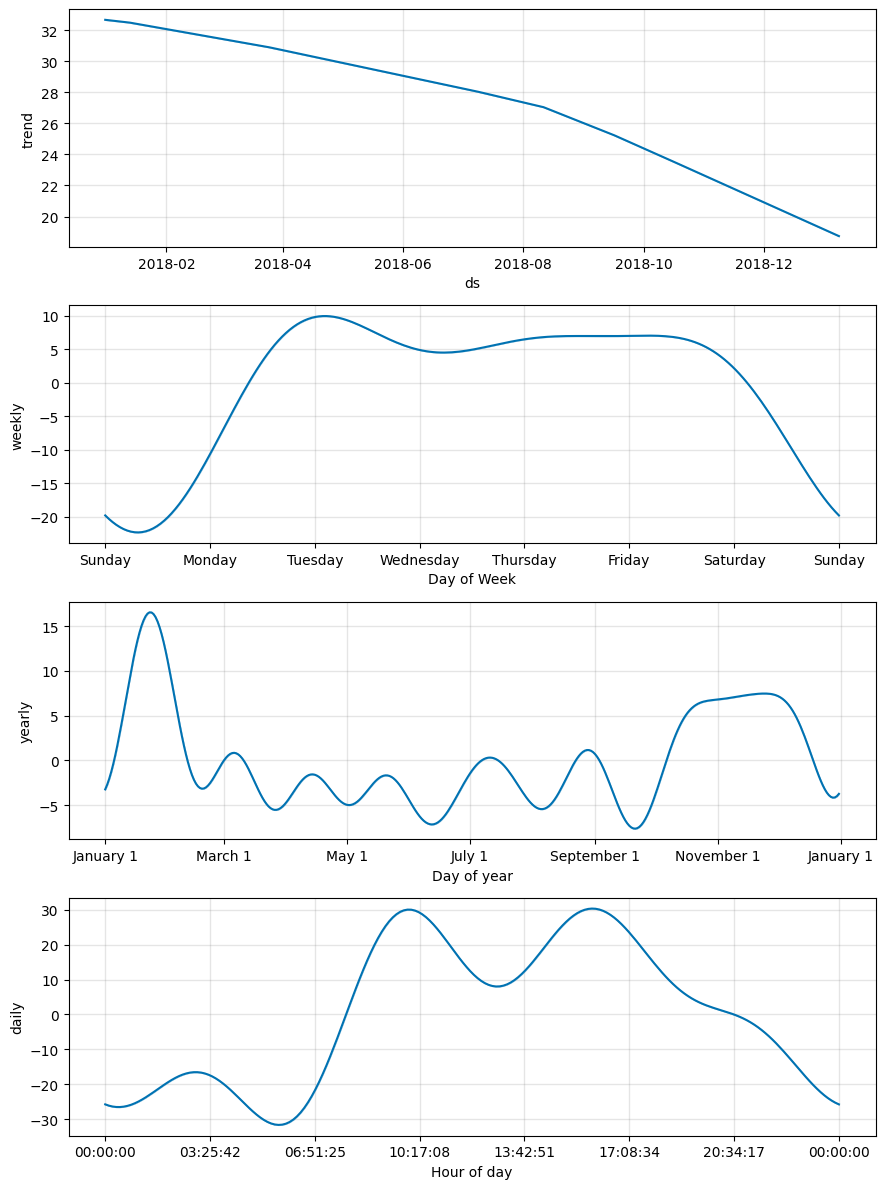

,ds,yhat,yhat_lower,yhat_upper
35198,2019-01-07 14:45:00,49.648339,19.396558,77.873343
35199,2019-01-07 15:45:00,57.151486,26.060512,86.505901
35200,2019-01-07 16:45:00,54.719251,22.870533,83.294785
35201,2019-01-07 17:45:00,45.275055,13.677501,75.554458
35202,2019-01-07 18:45:00,36.250606,5.488247,65.743062
35203,2019-01-07 19:45:00,31.735746,1.428693,61.396889
35204,2019-01-07 20:45:00,29.190414,-0.824050,59.188093
35205,2019-01-07 21:45:00,23.628437,-5.564355,54.039949
35206,2019-01-07 22:45:00,14.248760,-17.669398,44.946061
35207,2019-01-07 23:45:00,6.082217,-23.769119,37.122936


In [3]:
# 1. Bibliotheken importieren
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 2. Daten einlesen
# Hier anpassen, falls du die CSV-Datei laden musst
df = pd.read_csv('../../data/steel_industry_data.csv')

# Annahme: df liegt bereits vor
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# 3. Für Prophet vorbereiten
prophet_df = df[['date', 'Usage_kWh']].rename(columns={'date': 'ds', 'Usage_kWh': 'y'})

# 4. Prophet Modell erstellen und fitten
model = Prophet(
    daily_seasonality=True,   # tägliche Saisonalität
    weekly_seasonality=True,  # wöchentliche Saisonalität
    yearly_seasonality=True   # jährliche Saisonalität
)
model.fit(prophet_df)

# 5. Zukunftsdaten erstellen (z.B. Vorhersage für 7 Tage)
future = model.make_future_dataframe(periods=7*24, freq='h')  # stündliche Vorhersage für 7 Tage
forecast = model.predict(future)

# 6. Ergebnisse plotten
fig1 = model.plot(forecast)
plt.title('Prophet Forecast für Usage_kWh')
plt.show()

# 7. Komponentenplot (Trend, Saisonalität)
fig2 = model.plot_components(forecast)
plt.show()

# 8. Optional: Forecast ansehen
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
